In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
from scipy import stats
import os

In [2]:
path = "C:\\Users\\owner\\Documents\\Capstone Project-1\\age_gender_bkts.csv"
pwd= os.getcwd()
os.chdir(path)
#Load the data into the DataFrames
age_gender = pd.read_csv('age_gender_bkts.csv',encoding='utf-8')
age_gender.head(2)

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0


In [3]:
path = "C:\\Users\\owner\\Documents\\Capstone Project-1\\countries.csv"
pwd= os.getcwd()
os.chdir(path)
countries=pd.read_csv('countries.csv',encoding='utf-8')
countries.head(2)

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.0
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.0


In [4]:
path = "C:\\Users\\owner\\Documents\\Capstone Project-1\\sessions.csv"
pwd= os.getcwd()
os.chdir(path)
sessions=pd.read_csv('sessions.csv',encoding='utf-8')
sessions.head(2)

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0


In [5]:
path = "C:\\Users\\owner\\Documents\\Capstone Project-1\\train_users_2.csv"
pwd= os.getcwd()
os.chdir(path)
train_users=pd.read_csv('train_users_2.csv',encoding='utf-8')

In [6]:
path = "C:\\Users\\owner\\Documents\\Capstone Project-1\\test_users.csv"
pwd= os.getcwd()
os.chdir(path)
test_users=pd.read_csv('test_users.csv',encoding='utf-8')

In [7]:
users=pd.concat([train_users,test_users],ignore_index=True)
##The id of the user has been dropped for now
users.drop('id',axis=1,inplace=True)
users

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,NaN,NDF,2010-06-28,NaN,untracked,Chrome,Mac Desktop,-unknown-,en,Web,0,facebook,20090319043255
1,seo,google,38.0,NDF,2011-05-25,NaN,untracked,Chrome,Mac Desktop,MALE,en,Web,0,facebook,20090523174809
2,direct,direct,56.0,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,en,Web,3,basic,20090609231247
3,direct,direct,42.0,other,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,en,Web,0,facebook,20091031060129
4,direct,direct,41.0,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,-unknown-,en,Web,0,basic,20091208061105
5,other,other,NaN,US,2010-01-01,2010-01-02,omg,Chrome,Mac Desktop,-unknown-,en,Web,0,basic,20100101215619
6,other,craigslist,46.0,US,2010-01-02,2010-01-05,untracked,Safari,Mac Desktop,FEMALE,en,Web,0,basic,20100102012558
7,direct,direct,47.0,US,2010-01-03,2010-01-13,omg,Safari,Mac Desktop,FEMALE,en,Web,0,basic,20100103191905
8,other,craigslist,50.0,US,2010-01-04,2010-07-29,untracked,Safari,Mac Desktop,FEMALE,en,Web,0,basic,20100104004211
9,other,craigslist,46.0,US,2010-01-04,2010-01-04,omg,Firefox,Mac Desktop,-unknown-,en,Web,0,basic,20100104023758


In [8]:
users['date_account_created'] = pd.to_datetime(users['date_account_created'])
users['date_first_booking'] = pd.to_datetime(users['date_first_booking'])
users['date_first_active'] = pd.to_datetime((users.timestamp_first_active // 1000000), format='%Y%m%d')

# EXploratory Data Analysis

In [9]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275547 entries, 0 to 275546
Data columns (total 16 columns):
affiliate_channel          275547 non-null object
affiliate_provider         275547 non-null object
age                        158681 non-null float64
country_destination        213451 non-null object
date_account_created       275547 non-null datetime64[ns]
date_first_booking         88908 non-null datetime64[ns]
first_affiliate_tracked    269462 non-null object
first_browser              275547 non-null object
first_device_type          275547 non-null object
gender                     275547 non-null object
language                   275547 non-null object
signup_app                 275547 non-null object
signup_flow                275547 non-null int64
signup_method              275547 non-null object
timestamp_first_active     275547 non-null int64
date_first_active          275547 non-null datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(2), object(10)
memory 

In [10]:
users.describe()

,age,signup_flow,timestamp_first_active
count,158681.000000,275547.000000,2.755470e+05
mean,47.145310,4.291965,2.013310e+13
std,142.629468,8.794313,9.146438e+09
min,1.000000,0.000000,2.009032e+13
25%,28.000000,0.000000,2.013040e+13
50%,33.000000,0.000000,2.014010e+13
75%,42.000000,1.000000,2.014062e+13
max,2014.000000,25.000000,2.014093e+13


In [11]:
#x=users[['age','timestamp_first_active']]

In [12]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

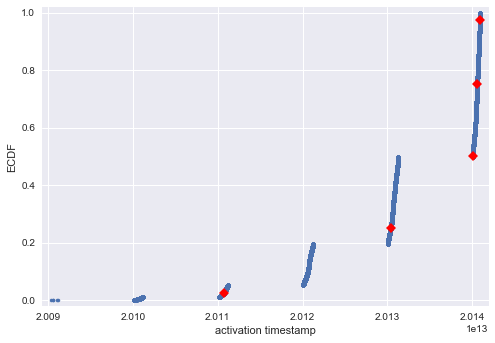

In [13]:
# Compute ECDF for timestamp_first_active data: x_timestamp, y_timestamp
x_timestamp, y_timestamp = ecdf(users.timestamp_first_active)

sns.set()
# Generate plot
plt.plot(x_timestamp,y_timestamp,marker='.',linestyle='none')

# Make the margins nice
plt.margins(0.02)

# Label the axes
_=plt.xlabel("activation timestamp")
_=plt.ylabel("ECDF")

# Specify array of percentiles: percentiles
percentiles=np.array([2.5,25,50,75,97.5])

# Compute percentiles: ptiles_timestamp
ptiles_timestamp=np.percentile(users.timestamp_first_active,percentiles)

# Print the result
#print(ptiles_timestamp)
p=percentiles/100
# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_timestamp, p, marker='D', color='red',
         linestyle='none')

# Show the plot
plt.show()

In [14]:
# Specify array of percentiles: percentiles
percentiles=np.array([2.5,25,50,75,97.5])

# Compute percentiles: ptiles_vers
ptiles_timestamp=np.percentile(users.timestamp_first_active,percentiles)

# Print the result
print(ptiles_timestamp)

[  2.01107252e+13   2.01304032e+13   2.01401032e+13   2.01406182e+13
   2.01409192e+13]


In [15]:
ecdf(users.timestamp_first_active)

(array([20090319043255, 20090523174809, 20090609231247, ..., 20140930235408,
        20140930235430, 20140930235901], dtype=int64),
 array([  3.62914494e-06,   7.25828987e-06,   1.08874348e-05, ...,
          9.99992742e-01,   9.99996371e-01,   1.00000000e+00]))

C:\Users\owner\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


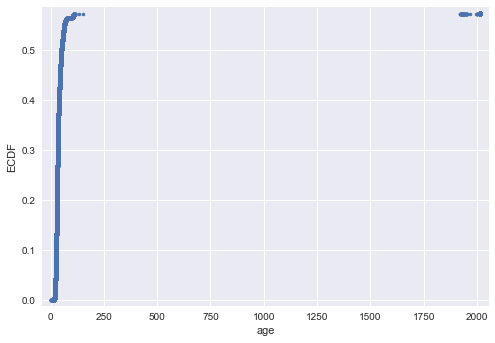

In [16]:
# Compute ECDF for age data: x_vers, y_vers
x_age, y_age = ecdf(users.age)

# Generate plot
plt.plot(x_age,y_age,marker='.',linestyle='none')

# Make the margins nice
plt.margins(0.02)

# Specify array of percentiles: percentiles
percentiles=np.array([2.5,25,50,75,97.5])

# Compute percentiles: ptiles_age
ptiles_age=np.percentile(users.age,percentiles)

# Print the result
#print(ptiles_timestamp)
p=percentiles/100
# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_age, p, marker='D', color='red',
         linestyle='none')

# Label the axes
plt.xlabel("age")
plt.ylabel("ECDF")



# Display the plot
plt.show()

In [17]:
ecdf(users.age)

(array([  1.,   1.,   1., ...,  nan,  nan,  nan]),
 array([  3.62914494e-06,   7.25828987e-06,   1.08874348e-05, ...,
          9.99992742e-01,   9.99996371e-01,   1.00000000e+00]))

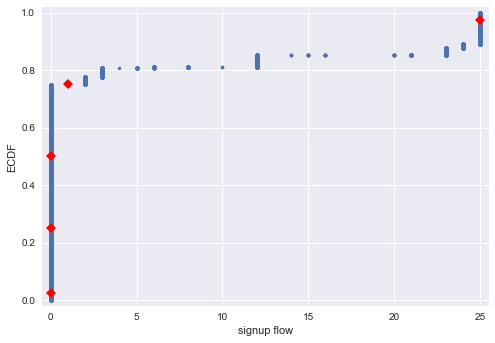

In [18]:
# Compute ECDF for user data: x_vers, y_vers
x_flow, y_flow = ecdf(users.signup_flow)

# Generate plot
plt.plot(x_flow,y_flow,marker='.',linestyle='none')

# Make the margins nice
plt.margins(0.02)

# Label the axes
plt.xlabel("signup flow")
plt.ylabel("ECDF")

# Specify array of percentiles: percentiles
percentiles=np.array([2.5,25,50,75,97.5])

# Compute percentiles: ptiles_flow
ptiles_flow=np.percentile(users.signup_flow,percentiles)

# Print the result
#print(ptiles_timestamp)
p=percentiles/100
# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_flow, p, marker='D', color='red',
         linestyle='none')

# Display the plot
plt.show()

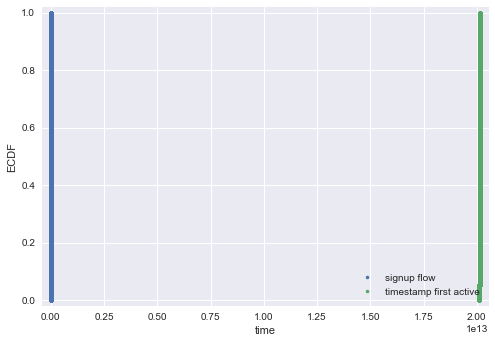

In [19]:
# Compute ECDFs
x_flow,y_flow=ecdf(users.signup_flow)
#x_created,y_created=ecdf(users.date_account_created)
x_timestamp,y_timestamp=ecdf(users.timestamp_first_active)

# Plot all ECDFs on the same plot
_=plt.plot(x_flow,y_flow,marker='.',linestyle='none')
#_=plt.plot(x_created,y_created,marker='.',linestyle='none')
_=plt.plot(x_timestamp,y_timestamp,marker='.',linestyle='none')

# Make nice margins
plt.margins(0.02)

# Annotate the plot
plt.legend(('signup flow', 'timestamp first active'), loc='lower right')
_ = plt.xlabel('time')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

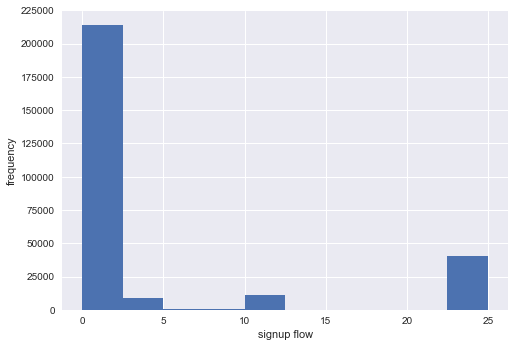

In [20]:
_=plt.hist(users['signup_flow'])
_=plt.xlabel('signup flow')
_=plt.ylabel('frequency')

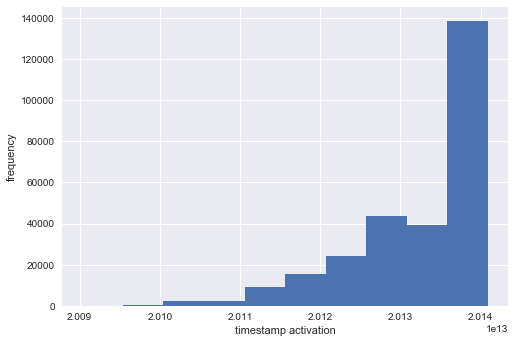

In [21]:
plt.hist(users['timestamp_first_active'])
plt.xlabel("timestamp activation")
plt.ylabel("frequency")

In [22]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275547 entries, 0 to 275546
Data columns (total 16 columns):
affiliate_channel          275547 non-null object
affiliate_provider         275547 non-null object
age                        158681 non-null float64
country_destination        213451 non-null object
date_account_created       275547 non-null datetime64[ns]
date_first_booking         88908 non-null datetime64[ns]
first_affiliate_tracked    269462 non-null object
first_browser              275547 non-null object
first_device_type          275547 non-null object
gender                     275547 non-null object
language                   275547 non-null object
signup_app                 275547 non-null object
signup_flow                275547 non-null int64
signup_method              275547 non-null object
timestamp_first_active     275547 non-null int64
date_first_active          275547 non-null datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(2), object(10)
memory 

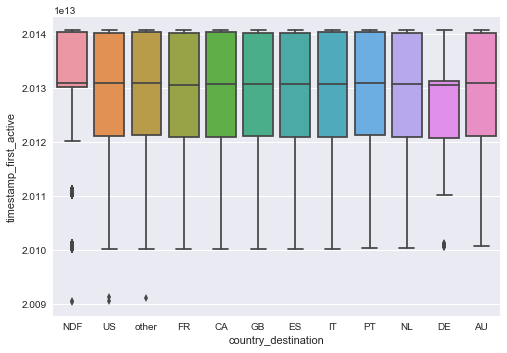

In [23]:
sns.boxplot(x='country_destination',y='timestamp_first_active',data=users)

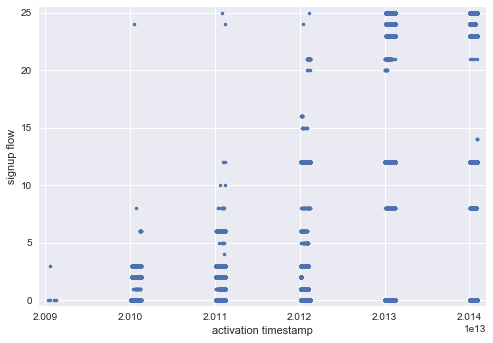

In [24]:
# Make a scatter plot
plt.plot(users.timestamp_first_active,users.signup_flow,marker='.',linestyle='none')


# Set margins
plt.margins(0.02)

# Label the axes
plt.xlabel("activation timestamp")
plt.ylabel("signup flow")

# Show the result
plt.show()

Now,We can make a Bernouli's Distribution where the probability of going to U.S. to be 1 and outside U.S. to be 0.Let's make a CDF out of it.

In [25]:
u=users
u=u[u.country_destination=='US']
len(u)

62376

In [26]:
#Probability of staying at U.S. can be computed by:
p=len(u)/len(users)
p

0.2263715446003767

# CDF of country destination

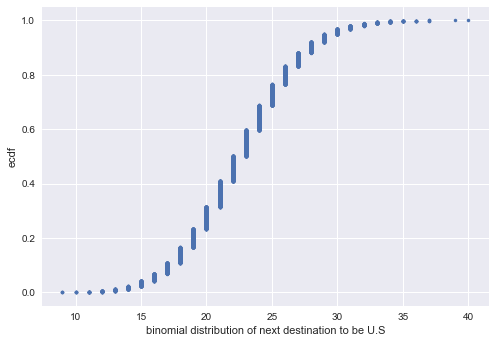

In [27]:
n_defaults=np.random.binomial(100,0.22637,size=10000)

# Compute CDF: x, y
x,y=ecdf(n_defaults)

# Plot the CDF with axis labels
plt.plot(x,y,marker='.',linestyle='none')
plt.xlabel("binomial distribution of next destination to be U.S")
plt.ylabel("ecdf")

# Show the plot
plt.show()

There is about 90% chance of that less than 30 users would choose U.S. to be their next vacation destination.The value of the CDF at x = 30 is  about 0.95, so the probability that x < 10 is 0.95. Thus, the probability that x > 10 is 0.05.

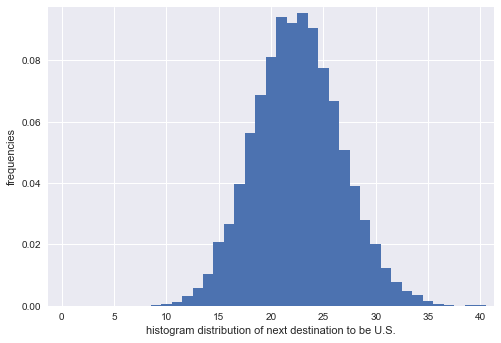

In [28]:
# Compute bin edges: bins
bins = np.arange(0,max(n_defaults)+ 1.5) - 0.5

# Generate histogram
plt.hist(n_defaults,normed=True,bins=bins)

# Set margins
plt.margins(0.02)

# Label axes
plt.xlabel("histogram distribution of next destination to be U.S.")
plt.ylabel("frequencies")

# Show the plot
plt.show()

The above histogram satifies the Central Limit Theorem and converges to a Normal Distribution Function when taken a large sample size.

In [29]:
# Compute mean and standard deviation: mu, sigma
mu=np.mean(users.country_destination)
sigma=np.std(users.country_destination)

# Sample out of a normal distribution with this mu and sigma: samples
samples=np.random.normal(mu,sigma,10000)

# Get the CDF of the samples and of the data
x_theor,y_theor = ecdf(samples)
x,y=ecdf(users.country_destination)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()


TypeError: must be str, not int

In [ ]:
users.info()

Now,let's look into some Pearson Correlation Coefficient.

In [ ]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor
#r = pearson_r(versicolor_petal_width, versicolor_petal_length)

# Print the result
#print(r)

In [ ]:
# Plot the age versus timestamp_first_active
_ = plt.plot(users.timestamp_first_active, users.signup_flow, marker='.',linestyle='none')

# Set the margins and label axes
plt.margins(0.02)
_ = plt.xlabel('signup')
_ = plt.ylabel('first activity')

# Show the plot
plt.show()

# Show the Pearson correlation coefficient
print(pearson_r(users.timestamp_first_active, users.signup_flow))

The Pearson Correlation Coefficient between signup flow and first activity is 0.23215.